# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5, 1.0, 'Temperatures of our server throughout the day')

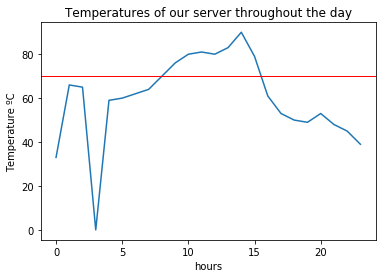

In [1]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [2]:
# assign a variable to the list of temperatures
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calculate the minimum of the list and print the value using print()
print('minimum =',min(temperatures_C))

minimum = 0


**Expected output**: 
```
minimum = 0
```

In [3]:
# 2. Calculate the maximum of the list and print the value using print()
print('maximum =',max(temperatures_C))

maximum = 90


**Expected output**: 
```
maximum = 90
```

In [4]:
# 3. Items in the list that are greater than 70ºC and print the result
print('temperatures higher or equal than 70ºC ',[i for i in temperatures_C if i >= 70])

temperatures higher or equal than 70ºC  [70, 76, 80, 81, 80, 83, 90, 79]


**Expected output**: 
```
temperatures higher or equal than 70ºC [70, 76, 80, 81, 80, 83, 90, 79]
```

In [5]:
# 4. Calculate the mean temperature throughout the day and print the result
print('mean = ', sum(temperatures_C)/len(temperatures_C))

mean =  60.25


**Expected output**: 
```
mean = 60.25
```

In [6]:
# 5.1 Solve the fault in the sensor by estimating a value
import numpy as np
from sklearn.linear_model import LinearRegression


y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

y.pop(3)
x.pop(3)

y = np.array(y).reshape(-1, 1)
x = np.array(x).reshape(-1, 1)

###### next step is create a model and fit it. Create an instance of the class LineraRegression, 
###### which represent the reggression model 

model = LinearRegression()

##### fit is called on model in order to calculate the optimal values of the weights (m - slope and b -intercept)

model.fit(x, y)

#### coefficient of determination 𝑅²

r_sq = model.score(x, y)
print( '𝑅² =', r_sq)

######## 𝑅² tells which amount  of variation in y can be exploained by the dependance on x using the regression model.
######## 𝑅² = 0,06 means that time only explains 5% of the temperature variability

#### slope and intercept

print('intercept =', model.intercept_)
print('slope =', model.coef_)

y_pred = model.predict(x)
# print('predicted response:', y_pred, sep='\n')

x_new = np.arange(24).reshape((-1, 1))
# print(x_new)
y_new = model.predict(x_new)
# print(y_new)


###### Missing value
x_3 = [[3]]
y_3 = model.predict(x_3)


print('Estimation of the temperature at 3:00 = ', y_3)

𝑅² = 0.05075253142870551
intercept = [68.71694449]
slope = [[-0.49263635]]
Estimation of the temperature at 3:00 =  [[67.23903544]]


Text(1, 90, 'Estimation temp at 3:00 = 67.2')

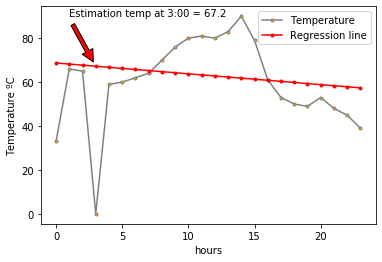

In [7]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y, '-ok', color = 'gray', markersize = 3, markerfacecolor='orange', label='Temperature')
plt.plot(x, y_new, '-ok', color = 'red', markersize = 3, markerfacecolor='red', label="Regression line")
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.legend()
plt.annotate('Estimation temp at 3:00 = 67.2', xy=(3, 67.23903544), xytext=(1, 90), fontsize=10,
            arrowprops=dict(facecolor='red', shrink=0.09),
            )

**Expected output**: 
```
Estimation of the temperature at 3:00 = 62.0
```

In [28]:
# 5.2 Update of the estimated value at 03:00 on the list

temperatures_C[3] = round(int(model.predict(x_3)),2)
print('Corrected temperatures after estimation: ', temperatures_C)

Corrected temperatures after estimation:  [33, 66, 65, 67, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


**Expected output**: 
```
Corrected temperatures after estimation:  [33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
```

In [29]:
# Bonus: convert the list of ºC to ºFarenheit
temperatures_F = []
for i in temperatures_C:
    far = 1.8*i +32
    temperatures_F.append(round(far,2))

print('Temperatures in Fahrenheit Grades = ', temperatures_F)

Temperatures in Fahrenheit Grades =  [91.4, 150.8, 149.0, 152.6, 138.2, 140.0, 143.6, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.2, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


**Expected output**: 
```
Temperatures in Fahrenheit Grades = [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]
```

## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [30]:
# Print True or False depending on whether you would change the cooling system or not
if len([i for i in y if i > 70]) > 4 or len([i for i in y if i > 80]) > 0 or sum(y)/len(y) > 65:
    print(True)
else: False


True


**Expected output**: 
```
True
```

## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [32]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
new_dict = {k :v for k,v in zip(x,y)}

hours_temp_over_70 = [k for k,v in new_dict.items() if v >= 70]

print(hours_temp_over_70)


[8, 9, 10, 11, 12, 13, 14, 15]


**Expected output**: 
```
[8, 9, 10, 11, 12, 13, 14, 15]```

In [33]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
sorted(hours_temp_over_70) == list(range(min(hours_temp_over_70), max(hours_temp_over_70)+1))

for i in range(len(hours_temp_over_70)):
    if sorted(hours_temp_over_70)[i: i+4] == list(range(min((hours_temp_over_70)[i: i+4]), max((hours_temp_over_70)[i: i+4])+1)):
        print(True)
        break



True


**Expected output**: 
```
True
```

In [40]:
# 3. Average of each of the lists (ºC and ºF). How they relate?
import numpy as np
print(np.mean(temperatures_C))
print(np.mean(temperatures_F))

print(np.mean(temperatures_F) , 1.8*np.mean(temperatures_C) + 32)


63.041666666666664
145.475
145.475 145.475


**Expected output**: 
```
62.833333333333336
145.1
145.1 145.10000000000002
```

In [46]:
# 4. Standard deviation of each of the lists. How they relate?
print(np.std(temperatures_C))
print(np.std(temperatures_F) , 1.8*np.std(temperatures_C))

14.655713239401061
26.38028383092191 26.38028383092191


**Expected output**: 
```
14.633485192833897
26.34027334710101
26.34027334710101 26.340273347101014
```